In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd 

 

**Definir y normalizar dataset para clasificacion de vinos (wine)**

In [28]:
#El dataset tiene 13 parametros y su salida genera 3 clases de vino (class_0=0, class1=1, class_2=2)
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)

normalized_df=(df-df.min())/(df.max()-df.min())

print (normalized_df)
print (data.target)


      alcohol  malic_acid  ...  od280/od315_of_diluted_wines   proline
0    0.842105    0.191700  ...                      0.970696  0.561341
1    0.571053    0.205534  ...                      0.780220  0.550642
2    0.560526    0.320158  ...                      0.695971  0.646933
3    0.878947    0.239130  ...                      0.798535  0.857347
4    0.581579    0.365613  ...                      0.608059  0.325963
..        ...         ...  ...                           ...       ...
173  0.705263    0.970356  ...                      0.172161  0.329529
174  0.623684    0.626482  ...                      0.106227  0.336662
175  0.589474    0.699605  ...                      0.106227  0.397290
176  0.563158    0.365613  ...                      0.128205  0.400856
177  0.815789    0.664032  ...                      0.120879  0.201141

[178 rows x 13 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1

**Definir datos de entrenamiento y validacion**

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_df, data.target, test_size=0.33, random_state=42)

#print(x_train)

print(x_train.shape)
#print(y_train)
print(y_train.shape)
#print(x_test)
print(x_test.shape)
#print(y_test)
print(y_test.shape)

(119, 13)
(119,)
(59, 13)
(59,)


**Clasificacion de las 3 clases de vino a one hot**

In [30]:
#Definición de los arreglos que almacenarán los datos de entrenamiento
y_trainOneHot=np.zeros([119,3],dtype=np.float64)


for cont in range(119):
  if y_train[cont]==0:
    y_trainOneHot[cont,0] =1
    y_trainOneHot[cont,1] =0
    y_trainOneHot[cont,2] =0                     
  if y_train[cont]==1:
    y_trainOneHot[cont,0] =0
    y_trainOneHot[cont,1] =1
    y_trainOneHot[cont,2] =0 
  if y_train[cont]==2:
    y_trainOneHot[cont,0] =0
    y_trainOneHot[cont,1] =0
    y_trainOneHot[cont,2] =1                           

n_samples=cont 
print(n_samples)
print(y_trainOneHot.shape)

y_testOneHot=np.zeros([59,3],dtype=np.float64)

for cont in range(59):
  if y_test[cont]==0:
    y_testOneHot[cont,0] =1
    y_testOneHot[cont,1] =0
    y_testOneHot[cont,2] =0                     
  if y_test[cont]==1:
    y_testOneHot[cont,0] =0
    y_testOneHot[cont,1] =1
    y_testOneHot[cont,2] =0 
  if y_test[cont]==2:
    y_testOneHot[cont,0] =0
    y_testOneHot[cont,1] =0
    y_testOneHot[cont,2] =1                           

n_samples=cont 
print(n_samples)
print(y_testOneHot.shape)


118
(119, 3)
58
(59, 3)


**Modelo de entrenamiento superficial**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
Total params: 853
Trainable params: 853
Non-trainable params: 0
_________________________________________________________________


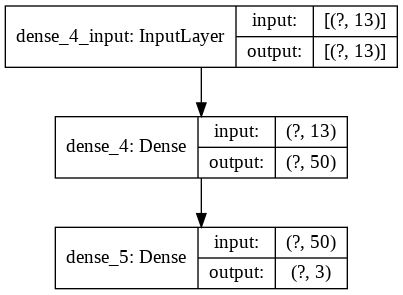

In [31]:
model = tf.keras.models.Sequential([                              
  tf.keras.layers.Dense(50, activation=tf.nn.tanh,input_shape=(13,)),
  tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)
])
model.summary()

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_trainOneHot, epochs=1000, verbose=0)


# Matrix de confusion con datos de entrenamiento red superficial

In [34]:
model.evaluate(x_train, y_trainOneHot)
outputTrain=model.predict(x_train)

Out_train=np.zeros([119,1],dtype=np.float64)
#Para la matriz de confusión se necesita la posición de la neurona que tuvo mayor #activación, esto determina la clase
for i in range(0,119):
    Out_train[i] = np.argmax(outputTrain[i,:])

#Nombres de las clases para la matriz de confusión    
class_names=['class_0', 'class_1','class_2']



4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000


In [35]:
#Función que permite graficar la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" Matrix de confusion Normalizada ")
    else:
        print('Matrix de confusion No Normalizada')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Salida Deseada')
    plt.xlabel('Salida Estimada')

Matrix de confusion No Normalizada
[[39  0  0]
 [ 0 47  0]
 [ 0  0 33]]
 Matrix de confusion Normalizada 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


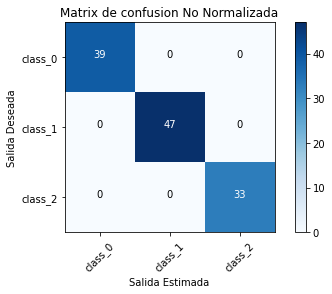

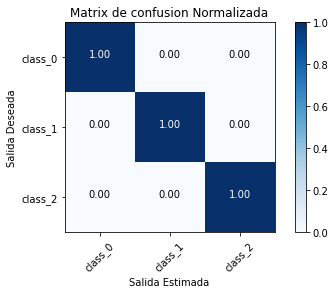

In [36]:
# Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_train, Out_train)
np.set_printoptions(precision=2)

# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()

# Matriz de confusion para datos de validacion red superficial(x_test, y_test)


In [39]:
model.evaluate(x_test, y_testOneHot)
outputTest=model.predict(x_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9831


In [40]:
Out_CM=np.zeros([59,1],dtype=np.float64)
#Para la matriz de confusión se necesita la posición de la neurona que tuvo mayor #activación, esto determina la clase
for i in range(0,59):
    Out_CM[i] = np.argmax(outputTest[i,:])

#Nombres de las clases para la matriz de confusión    
class_names=['class_0', 'class_1', 'class_2']

In [41]:
#Función que permite graficar la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" Matrix de confusion Normalizada ")
    else:
        print('Matrix de confusion No Normalizada')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Salida Deseada')
    plt.xlabel('Salida Estimada')

In [42]:
# Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_test, Out_CM)
np.set_printoptions(precision=2)

Matrix de confusion No Normalizada
[[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]
 Matrix de confusion Normalizada 
[[1.   0.   0.  ]
 [0.04 0.96 0.  ]
 [0.   0.   1.  ]]


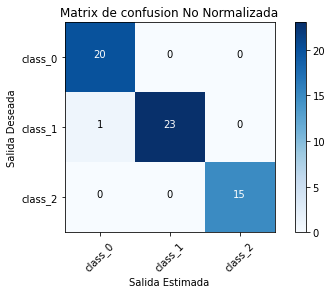

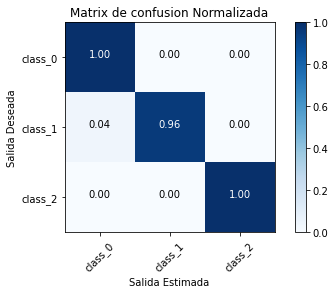

In [43]:
# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()

# Modelo de entrenamiento de red profunda

In [44]:
modelP = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(13,)),
  tf.keras.layers.Dense(1000, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

modelP.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelP.fit(x_train, y_train, epochs=100, verbose=0)



In [45]:
modelP.evaluate(x_test, y_test)
modelP.predict(x_test)
print(modelP.predict(x_test))
print(y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9831
[[1.00e+00 3.46e-04 1.09e-04]
 [9.99e-01 6.06e-05 8.72e-04]
 [8.74e-03 1.42e-02 9.77e-01]
 [9.98e-01 1.67e-03 7.51e-05]
 [1.97e-03 9.98e-01 1.06e-05]
 [1.00e+00 3.30e-05 2.07e-04]
 [7.18e-04 9.99e-01 1.14e-05]
 [9.28e-04 1.62e-04 9.99e-01]
 [1.48e-02 9.85e-01 4.62e-06]
 [2.80e-02 2.51e-03 9.70e-01]
 [9.20e-01 7.99e-02 7.25e-05]
 [4.06e-04 7.59e-05 1.00e+00]
 [9.91e-01 8.31e-03 1.06e-03]
 [2.72e-02 7.89e-01 1.84e-01]
 [1.00e+00 4.98e-05 1.14e-04]
 [1.28e-03 9.99e-01 2.91e-05]
 [1.31e-04 1.00e+00 6.72e-06]
 [1.01e-04 1.00e+00 3.11e-06]
 [1.00e+00 2.68e-04 2.58e-05]
 [1.29e-03 9.99e-01 1.93e-05]
 [1.00e+00 1.72e-06 9.74e-06]
 [3.22e-02 9.68e-01 3.32e-06]
 [1.17e-02 9.68e-01 2.03e-02]
 [5.90e-04 2.54e-05 9.99e-01]
 [1.38e-04 1.69e-04 1.00e+00]
 [4.33e-04 1.08e-04 9.99e-01]
 [1.05e-04 1.00e+00 2.23e-06]
 [8.69e-02 9.13e-01 1.92e-04]
 [3.75e-04 1.00e+00 5.13e-05]
 [9.98e-01 1.51e-03 1.70e-04]
 [9.98e-01 1.65

In [46]:
modelP.evaluate(x_test, y_test)
curr_Output=modelP.predict(x_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9831


4/4 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Matrix de confusion No Normalizada
[[39  0  0]
 [ 0 47  0]
 [ 0  0 33]]
 Matrix de confusion Normalizada 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


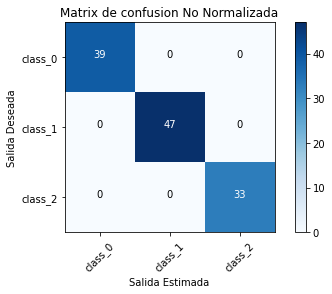

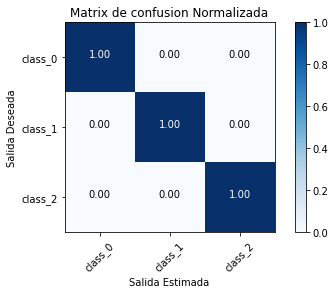

In [47]:
modelP.evaluate(x_train, y_train)
en_Output=modelP.predict(x_train)

Out_test_CM=np.zeros([119,1],dtype=np.float64)
for h in range(0,119):
    Out_test_CM[h] = np.argmax(en_Output[h,:])

    #Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_train, Out_test_CM)
np.set_printoptions(precision=2)

# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()

**Matrix de confusion datos de validacion red profunda**

In [48]:
Out_test_CM=np.zeros([59,1],dtype=np.float64)
for ii in range(0,59):
    Out_test_CM[ii] = np.argmax(curr_Output[ii,:])

Matrix de confusion No Normalizada
[[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]
 Matrix de confusion Normalizada 
[[1.   0.   0.  ]
 [0.04 0.96 0.  ]
 [0.   0.   1.  ]]


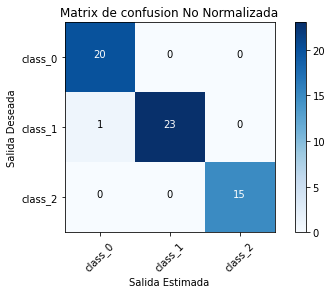

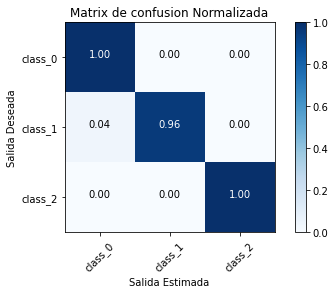

In [49]:
#Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_test, Out_test_CM)
np.set_printoptions(precision=2)

# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()